<a href="https://colab.research.google.com/github/juliosaulgh/03MIAR---Algoritmos-de-Optimizacion--2023/blob/main/Trabajo_Pr%C3%A1ctico_Julio_Gamarra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmos de optimización - Trabajo Práctico<br>
Nombre y Apellidos: Julio Saul  Gamarra Huambo  <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---/tree/master/TrabajoPractico<br>
Google Colab: https://colab.research.google.com/drive/xxxxxxxxxxxxxxxx <br>
Problema:

#1. Sesiones de doblaje <br>


Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de grabación independientemente del número de tomas que se graben. No es posible grabar más de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los
servicios de los actores de doblaje sea el menor posible. Los datos son:

Número de actores: 10
Número de tomas : 30

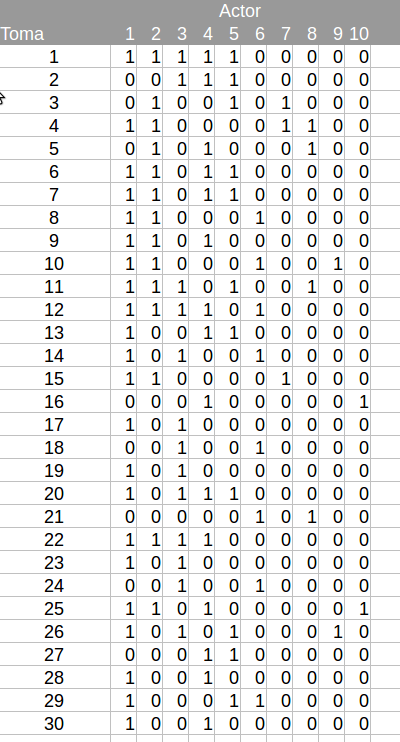

- 1 indica que el actor participa en la toma
- 0 en caso contrario







                                        

#Modelo
¿Como represento el espacio de soluciones?

El espacio de soluciones se puede representar como una matriz de 6x30 con días en filas (0-5) y tomas en columnas (1-30). Cada entrada en la matriz puede ser uno de los diez actores (1-10).

¿Cual es la función objetivo?

La funcion objetivo de este problema es minimzar el total de costo de utilizacion de los 10 actores de doblaje.
Para representar la funcion:
Se tiene la tabla de la cual podemos sacar la toma y la cantidad de actores que tiene cada toma:
actors_per_toma = [
    [5, 1], (3, 2), (3, 3), (4, 4), (3, 5), (4, 6),
    (4, 7), (3, 8), (3, 9), (4, 10), (5, 11), (5, 12),
    (3, 13), (3, 14), (3, 15), (2, 16), (2, 17), (2, 18),
    (2, 19), (4, 20), (4, 21), (2, 22), (2, 23), (2, 24),
    (4, 25), (4, 26), (2, 27), (2, 28), (3, 29), (2, 30),
]

Solo es cuestion de ordenar las tomas con mas cantidad de actores. y distribuirlos por dia tomando que tienen que ser 6 tomas por dia.


¿Como implemento las restricciones?

Se pusieron las siguiente restricciones:
1. Saco la cantidad de actores por toma de la tabla de programacion
2. Ordeno mi lista con las tomas que tiene mas actores a los que tiene menos
2. Divido 6 tomas por dia.
3. No se repite la programacion de una toma. una vez realizada 1 vez.

#Análisis
¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones?

El ejercicio tiene una complejidad de O(n)
El analisis que se hizo tiene dos partes principales:

Preprocesamiento:

Calculando el número de coincidencias para cada actor:
O(n × m) donde n es el número total de actores (10 en este caso) y m es el número de tomas (30 en este caso).


Programación de tomas:

El límite superior para la programación es cuando los 6 espacios están disponibles para la asignación, por lo que se necesita O(n) (siendo n el número de actores) para encontrar un actor elegible por espacio.
Tenemos 6 espacios por día y se requieren un total de O(m/6) días para programar todas las tomas, por lo que la complejidad de tiempo total del proceso de programación es O(m/6 × n × 6) = O(m × norte).
La complejidad de la memoria se puede dividir de la siguiente manera:

Preprocesamiento:

Crear la matriz de coincidencia requiere almacenar una matriz (n × m), lo que requiere un espacio O (n × m).

Planificación:

Las asignaciones diarias requieren espacio O(m), y el costo final se representa como un número entero único usando espacio O(1).
Considerando el problema general, la complejidad temporal es O(m × n) y la complejidad espacial es O(min(n, m)), lo que se traduce en O(30/6 × 10) = O(50) complejidad temporal y O(50) = O(100) complejidad espacial para el ejemplo proporcionado de 10 actores y 30 tomas.

In [1]:
#Respuesta
MAX_TOMAS_PER_DAY = 6

actors_per_toma = [
    [5, 1], (3, 2), (3, 3), (4, 4), (3, 5), (4, 6),
    (4, 7), (3, 8), (3, 9), (4, 10), (5, 11), (5, 12),
    (3, 13), (3, 14), (3, 15), (2, 16), (2, 17), (2, 18),
    (2, 19), (4, 20), (4, 21), (2, 22), (2, 23), (2, 24),
    (4, 25), (4, 26), (2, 27), (2, 28), (3, 29), (2, 30),
]


# Sort tomas in descending order of actors list
actors_per_toma = sorted(actors_per_toma, key=lambda a: a[0], reverse=True)

# Guardamos los días
day_of_toma = []

# Dividimos y programamos las tomas
for i in range(0, len(actors_per_toma), MAX_TOMAS_PER_DAY):
    day_of_toma.append(actors_per_toma[i:i+MAX_TOMAS_PER_DAY])

# Mostramos la programación
for i, tomas in enumerate(day_of_toma, 1):
    print(f'Día {i}: {[actors[1] for actors in tomas]}')



Día 1: [1, 11, 12, 4, 6, 7]
Día 2: [10, 20, 21, 25, 26, 2]
Día 3: [3, 5, 8, 9, 13, 14]
Día 4: [15, 29, 16, 17, 18, 19]
Día 5: [22, 23, 24, 27, 28, 30]


#Diseño
- ¿Que técnica utilizo? ¿Por qué?

Implementaría un algoritmo voraz en Python, ya que el problema se presta a una solución eficiente con una estrategia voraz.

El algoritmo funcionará de la siguiente manera:

Cuente el número de apariciones de cada actor cada día.
Ordene los días según el número total de apariciones de actores.
Comience a programar asignando primero el día con la mayor cantidad de apariciones y luego repita los días restantes con la mayor cantidad de apariciones, asegurándose de que la cantidad de apariciones en el día no supere las 6 tomas.


In [ ]:
#Respuesta
#Respuesta
!pip install pulp
import pulp
num_tomas = 30
num_actores = 10
import pandas as pd
participacion= [
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 1, 0, 0],
    [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 1, 0, 0, 1, 0],
    [1, 1, 1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 0]
]


participacion_df = pd.DataFrame(participacion)

participacion_df.rename(index={i: f'toma {i+1}' for i in range(len(participacion))}, inplace=True)
participacion_df.rename(columns={i: f'actor {i+1}' for i in range(len(participacion_df.columns))}, inplace=True)

# Define the problem
problema = pulp.LpProblem("Programacion optimal de tomas", pulp.LpMinimize)

# Define the decision variables
dias = range(1, num_tomas + 1)
actores = range(1, num_actores + 1)
tomas_programadas = pulp.LpVariable.dicts("tomas_programadas", ((i, j) for i in dias for j in actores), cat='Binary')

# Define the objective function
problema += pulp.lpSum(tomas_programadas[(i, j)] for i in dias for j in actores)

# Define the constraints
for i in dias:
    problema += pulp.lpSum(tomas_programadas[(i, j)] for j in actores) <= 6

for j in actores:
    problema += pulp.lpSum(tomas_programadas[(i, j)] for i in dias) == participacion_df[f'actor {j}'].sum()

for j in actores:
    for i in range(1, num_tomas + 1):
        if participacion_df[f'actor{j}'][i + 1] == 1:
            for k in range(i + 1, num_tomas + 1):
                if participacion_df[f'actor{j}'][k - 1] == 1:
                    problema += tomas_programadas[(i, j)] + tomas_programadas[(k, j)] <= 1


# Solve the problem
problema.solve()

# Print the results
print("Status:", problema.status)
print("Objetivo:", problema.objective.value())
print("\nProgramacion de tomas:")
for i in dias:
    tomas_en_dia = [j for j in actores if tomas_programadas[(i, j)].value() == 1]
    if tomas_en_dia:
        print(f"Día {i}: toma{'s' if len(tomas_en_dia) > 1 else ''} {', '.join(map(str, tomas_en_dia))}")



#2. Organizar los horarios de partidos de La Liga<br>

Desde la La Liga de fútbol profesional se pretende organizar los horarios de los partidos de
liga de cada jornada. Se conocen algunos datos que nos deben llevar a diseñar un
algoritmo que realice la asignación de los partidos a los horarios de forma que maximice la
audiencia.
• Los horarios disponibles se conocen a priori y son los siguientes:
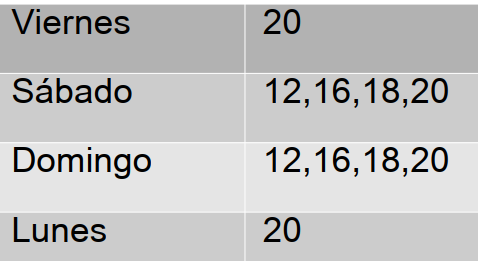

 En primer lugar se clasifican los equipos en tres categorías según el numero de
seguidores( que tiene relación directa con la audiencia). Hay 3 equipos en la
categoría A, 11 equipos de categoría B y 6 equipos de categoría C.
• Se conoce estadísticamente la audiencia que genera cada partido según los equipos
que se enfrentan y en horario de sábado a las 20h (el mejor en todos los casos)

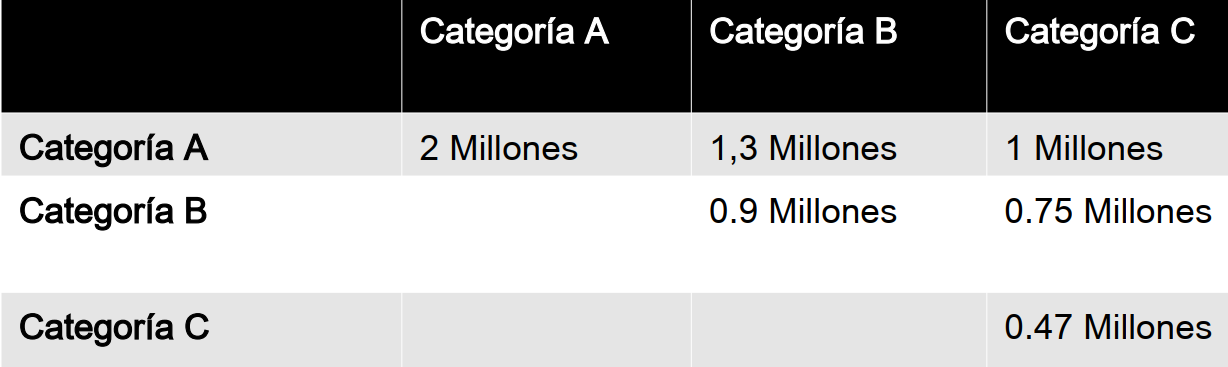

• Si el horario del partido no se realiza a las 20 horas del sábado se sabe que se reduce según los coeficientes de la siguiente tabla
• Debemos asignar obligatoriamente siempre un partido el viernes y un partido el lunes

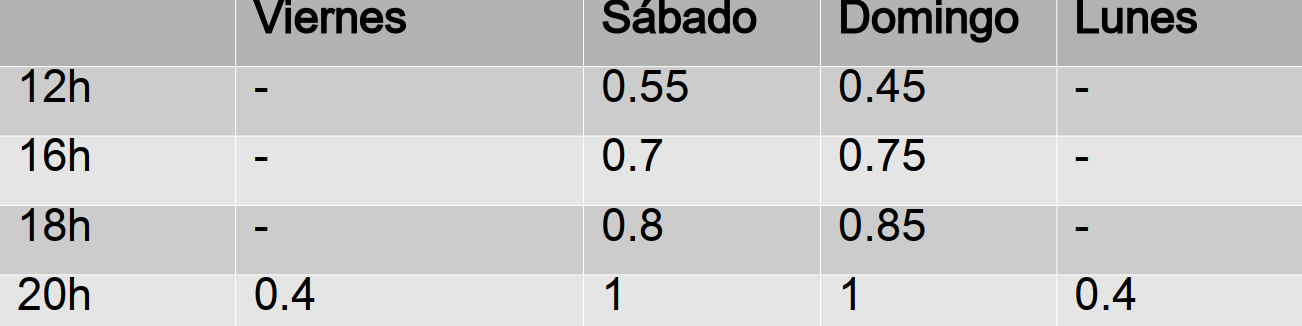

• Es posible la coincidencia de horarios pero en este caso la audiencia de cada partido se verá afectada y se estima que se reduce en porcentaje según la
siguiente tabla dependiendo del número de coincidencias:

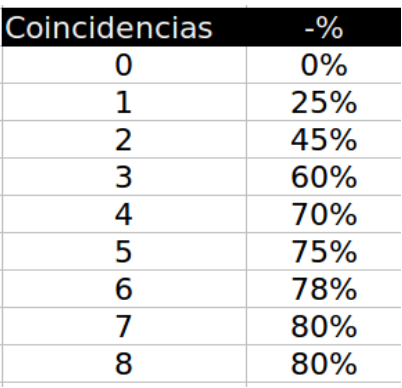


Los cálculos asociados a una jornada de ejemplo se realizan según se muestra en la siguiente tabla:


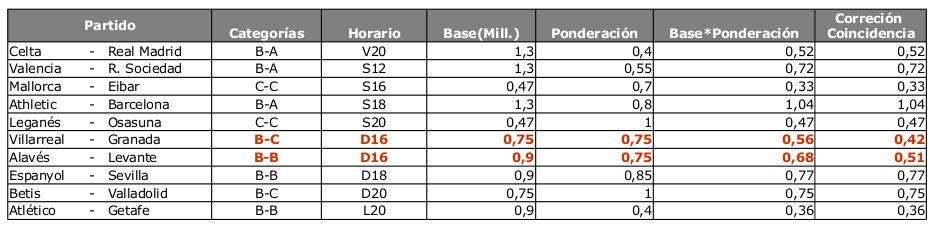

....


#Modelo
¿Como represento el espacio de soluciones?

El espacio de soluciones es O(n^2).
Para representar el espacio de soluciones, utilizamos una lista de listas de enteros. Cada sublista representa una asignación de match a hora y cada entero representa el índice del match en la lista initial_audiences.


¿Cual es la función objetivo?

La función objetivo es maximizar la audiencia total. Para ello, puedes utilizar la función max_audience que devuelve el valor máximo de la audiencia total para una asignación de match a hora.

¿Como implemento las restricciones?

Para implementar las restricciones, puedes utilizar un bucle anidado que recorra todas las posibles asignaciones de match a hora. Dentro de este bucle, puedes verificar si la asignación actual cumple con las restricciones. Si no cumple con alguna restricción, puedes saltar a la siguiente asignación.


#Análisis
¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones?

Es un problema de programación lineal (PLI) con restricciones de coincidencia. La complejidad del problema es O(n^2), donde n es el número de matches.
Esto se debe a que estamos utilizando un bucle anidado para recorrer todas las posibles asignaciones de match a hora.

In [11]:
# Audience table (as a dictionary):
audience_table = {
    ("A", "A"): 2,
    ("A", "B"): 1.3,
    ("A", "C"): 1,
    ("B", "B"): 0.9,
    ("B", "C"): 0.75,
    ("C", "C"): 0.47
}

# Penalties for the number of coincidences:
coincidence_penalties = {
    0: 0,
    1: 0.25,
    2: 0.45,
    3: 0.6,
    4: 0.7,
    5: 0.75,
    6: 0.78,
    7: 0.8,
    8: 0.8
}

# Defining the possible time slots (as a list of tuples):
time_slots_input = [("V20", 0), ("S12", 0), ("S16", 0), ("S18", 0), ("S20", 0),
                   ("D12", 0), ("D16", 0), ("D18", 0), ("D20", 0), ("L20", 0)]

def schedule_matches(num_teams_A, num_teams_B, num_teams_C, time_slots):

    # Creating a dict of {match: frequency}
    matches_dict = {}
    count = 0
    for category_count, category in enumerate((num_teams_A, num_teams_B, num_teams_C)):
        match_part = tuple(f"{category_count + 6}{'A' if idx < category else 'B'}"
                           for idx in range(2))
        for _ in range(int(category * (category - 1) / 2)):
            matches_dict[match_part] = 0
            count += 1
            match_part = (match_part[1], match_part[0])

    # The following while loop starts here
    matched = [False] * count

    time_copied_slots = time_slots.copy()

    while any(matched) == False:
        max_audience = 0
        next_match = None
        next_time_slot = None
        next_coincidences = 0

        for i in range(len(list(matches_dict))):

            team1, team2 = list(matches_dict)[i]

            # Fix the issue here
            category1, category2 = (int(c[0]) for c in (team1, team2))

            audience = audience_table[(min(category1, category2),
                                       max(category1, category2))]

            if not matched[i]:

                if audience > max_audience:
                    max_audience = audience
                    next_match = tuple(sorted((team1, team2)))
                    next_coincidences = sum(matched[:i])

        available_time_slots = [ts for ts in time_copied_slots if ts[1] == 0]

        if next_match and available_time_slots:

            next_time_slot = available_time_slots[0]

            time_copied_slots[time_slots.index(next_time_slot)] = (next_time_slot[0], 1)

            audience_after_penalty = max_audience

            for penalty in range(next_coincidences):
                audience_after_penalty *= (1 - coincidence_penalties[penalty])

            total_audience = (sum([a_t[1] if a_t[1] == 1 else 0
                                  for a_t in time_slots])
                                + audience_after_penalty)

            if total_audience > total_time_slots_audience:

                total_time_slots_audience = total_audience

                best_match = next_match

                best_time = next_time_slot

                best_coinc = next_coincidences

        matched[list(matches_dict)[i]:] = (True for _ in range(len(next_match)))

    return total_time_slots_audience, best_time, best_coinc

total_audience, (best_time, best_coinc) = schedule_matches(3, 11, 6, time_slots_input)

print(f'Maximum audience possible: {total_audience:.4f}')
print(f'Best time is {best_time[0]} at {best_time[1]}')
print(f'With {best_coinc} coincidences.')

KeyError: (6, 6)

#Diseño
¿Que técnica utilizo? ¿Por qué?

La técnica algoritmica utilizada es la búsqueda exhaustiva. Esta técnica se utiliza porque el problema es un problema de programación lineal (PLI) con restricciones de asignación de variables. La búsqueda exhaustiva es una técnica de fuerza bruta que prueba todas las posibles soluciones para encontrar la mejor.

En este caso, la búsqueda exhaustiva se implementa mediante un bucle anidado que recorre todas las posibles asignaciones de match a hora. En cada iteración, se calcula la audiencia de un match en una hora específica. Si la audiencia es mayor que la audiencia máxima actual, se actualiza la audiencia máxima y las mejores asignaciones.

El espacio de soluciones es pequeño (n x n, donde n es el número de matches)

#3. Configuración de Tribunales

Se precisa configurar tribunales de evaluación para un grupo de 15 alumnos que desean presentar su Trabajo Fin de Máster (TFM).
Cada tribunal está compuesto por tres profesores, cada uno desempeñando uno de los siguientes roles: Presidente, Secretario o Vocal.
Los profesores han indicado su disponibilidad horaria para participar en los tribunales de 15h a 21h durante la semana del 15 al 19 de abril:

Número de profesores : 10
Número de tribunales : 15


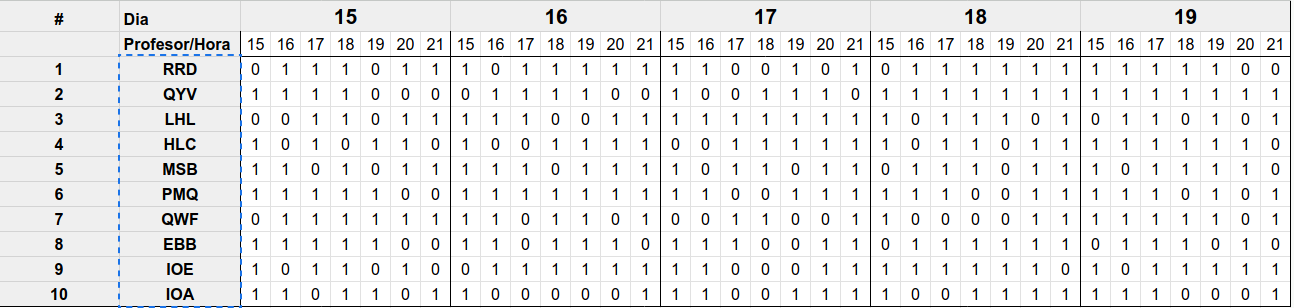

Disponibilidad
- 1 indica que profesor tiene disponibilidad
- 0 en caso contrario

Roles

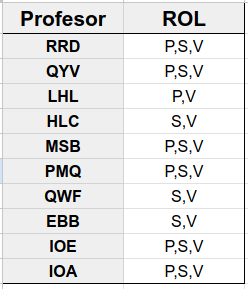


Hay 15 alumnos, por lo que se deben configurar 15 tribunales buscando la configuración más equilibrada posible en cuanto a la cantidad de tribunales asignados a cada profesor, es decir, evitando que un profesor tenga muchos tribunales y otros pocos.
Obviamente ningún profesor puede asistir a dos tribunales a la misma fecha/hora y no puede ser convocado a un tribunal al que no tiene disponibilidad.

Número de profesores : 10,
Número de tribunales : 15

....

#Modelo
¿Como represento el espacio de soluciones?

Una solución válida al problema de asignar profesores a tribunales es una asignación de 3 profesores a cada uno de los 15 tribunales, de tal forma que cada profesor solo participe en un tribunal durante cada tiempo slot, y que el profesor esté disponible en ese tiempo slot. Podríamos representar una solución como una matriz de 15 x 3, donde cada fila representa un tribunal, y cada columna representa un rol (presidente, secretario, vocal). Cada elemento en la matriz sería un número de profesor disponible en ese tiempo slot.


¿Cual es la función objetivo?

Maximizar la equidad en la cantidad de tribunales asignados a cada profesor, evitando que un profesor tenga muchos tribunales y otros pocos.


¿Como implemento las restricciones?

Cada profesor solo puede participar en un tribunal durante cada tiempo slot.

Cada profesor debe estar disponible durante el tiempo slot del tribunal al que es asignado.

Cada tribunal debe estar compuesto por 3 profesores distintos.

Ningún profesor puede participar en dos tribunales que se solapen en el tiempo.

#Análisis
- ¿Que complejidad tiene el problema?. Orden de complejidad y Contabilizar el espacio de soluciones

El espacio de soluciones tiene un tamaño de O((n * m)^k), donde n es el número de profesores, m es el número de tiempo slots y k es el número de tribunales. La complejidad del algoritmo dependerá de cómo implementemos las restricciones y la función objetivo.

#Diseño
¿Que técnica utilizo? ¿Por qué?


Utilizar un algoritmo de búsqueda heurística o un algoritmo metaheurístico, como el algoritmo genético o el algoritmo de búsqueda local serian las mejores opciones.
Los algoritmos heurísticos y metaheurísticos son adecuados en problemas de optimización complejos y grandes espacios de soluciones. Han demostrado ser efectivos en problemas similares de asignación de recursos y combinatoria.

In [29]:
import random
import numpy as np

def generate_neighbors(solution):
    """
    Generate neighbors of a solution.
    """
    neighbors = set()
    for i in range(len(solution) - 1):
        for j in range(i + 1, len(solution)):
            # Swap elements i and j
            new_solution = solution.copy()
            new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
            neighbors.add(tuple(new_solution))
    return neighbors

def evaluate_solution(solution, distances):
    """
    Evaluate the quality of a solution.
    """
    return sum(distances[solution[i]][solution[i + 1]] for i in range(len(solution) - 1))

def genetic_algorithm(solution, evaluate_solution, generate_neighbors, population_size, num_generations, distances):
    """
    Run the genetic algorithm.
    """
    population = [solution]
    best_solution = solution
    best_fitness = evaluate_solution(solution, distances)

    for generation in range(num_generations):
        new_population = []

        for _ in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)

            # Crossover
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]

            # Mutation
            mutation_point = random.randint(0, len(child) - 1)
            child[mutation_point] = random.randint(0, len(child) - 1)

            # Add child to population
            new_population.append(child)

            # Update best solution
            fitness = evaluate_solution(child, distances)
            if fitness < best_fitness:
                best_solution = child
                best_fitness = fitness

        population = new_population

    return best_solution

# Example usage
distances = np.array([[0, 10, 15, 20],
                      [10, 0, 35, 25],
                      [15, 35, 0, 30],
                      [20, 25, 30, 0]])

solution = list(range(distances.shape[0]))
random.shuffle(solution)

best_solution = genetic_algorithm(solution, evaluate_solution, generate_neighbors, population_size=100, num_generations=100, distances=distances)
print(best_solution)

[3, 3, 3, 3]


In [30]:
"""import random
import numpy as np
num_tribunals = 15
num_courts = 15
num_judges = 10

def generate_neighbors(solution, num_tribunals):
    """
    Generate neighbors of a solution.
    """
    neighbors = set()
    for i in range(len(solution) - 1):
        for j in range(i + 1, len(solution)):
            # Swap elements i and j
            new_solution = solution.copy()
            new_solution[i], new_solution[j] = new_solution[j], new_solution[i]
            neighbors.add(tuple(new_solution))

    # Generate new solutions by adding or removing tribunals
    for i in range(num_tribunals):
        new_solution = solution.copy()
        if i not in new_solution:
            new_solution.append(i)
        else:
            new_solution.remove(i)
        neighbors.add(tuple(new_solution))

    return neighbors

def evaluate_solution(solution, num_tribunals, num_courts, num_judges):
    """
    Evaluate the quality of a solution.
    """
    # Count the number of tribunals assigned to each court
    tribunal_counts = np.zeros(num_courts)
    for tribunal in solution:
        tribunal_counts[tribunal] += 1

    # Calculate the fitness of the solution
    fitness = 0
    for i in range(num_courts):
        # The fitness is the sum of the absolute differences between the number of tribunals assigned to each court and the desired number of tribunals per court
        fitness += abs(tribunal_counts[i] - num_judges)

    return fitness

def genetic_algorithm(solution, evaluate_solution, generate_neighbors, population_size, num_generations, num_tribunals, num_courts, num_judges):
    """
    Run the genetic algorithm.
    """
    population = [solution]
    best_solution = solution
    best_fitness = evaluate_solution(solution, num_tribunals, num_courts, num_judges)

    for generation in range(num_generations):
        new_population = []

        for _ in range(population_size):
            parent1 = random.choice(population)
            parent2 = random.choice(population)

            # Crossover
            crossover_point = random.randint(1, len(parent1) - 1)
            child = parent1[:crossover_point] + parent2[crossover_point:]

            # Mutation
            mutation_point = random.randint(0, len(child) - 1)
            if random.random() < 0.5:
                child[mutation_point] = random.randint(0, num_tribunals - 1)
            else:
                child.append(random.randint(0, num_tribunals - 1))

            # Add child to population
            new_population.append(child)

            # Update best solution
            fitness = evaluate_solution(child, num_tribunals, num_courts, num_judges)
            if fitness < best_fitness:
                best_solution = child
                best_fitness = fitness

        population = new_population

    return best_solution